In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from skimage.transform import resize

# Load the training datasets for DP and NDP
train_dp = pd.read_csv(r'D:\DataSet\train\trainDP.csv')
train_ndp = pd.read_csv(r'D:\DataSet\train\trainNDP.csv')

# Load the testing datasets for DP and NDP
test_dp = pd.read_csv(r'D:\DataSet\test\testDP.csv')
test_ndp = pd.read_csv(r'D:\DataSet\test\testNDP.csv')

# Combine DP and NDP datasets for training and testing
train_data = pd.concat([train_dp, train_ndp], ignore_index=True)
test_data = pd.concat([test_dp, test_ndp], ignore_index=True)

# Drop problematic columns
train_data = train_data.drop(columns=['FFT', 'Power spectral density'])
test_data = test_data.drop(columns=['FFT', 'Power spectral density'])

# Separate features and target variable for training data
X_train = train_data.drop(columns=['Class']).values
y_train = train_data['Class'].values

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Class']).values
y_test = test_data['Class'].values

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Resize input data to meet the minimum size requirement of EfficientNetB0
X_train_resized = np.array([resize(image, (32, 32), anti_aliasing=True) for image in X_train])
X_test_resized = np.array([resize(image, (32, 32), anti_aliasing=True) for image in X_test])

# Expand dimensions to simulate three channels
X_train_resized = np.expand_dims(X_train_resized, axis=-1)
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)

X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load EfficientNetB0 model pretrained on ImageNet without top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(128, activation='relu')(x)

# Add a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with 50 epochs
model.fit(X_train_resized, y_train_encoded, epochs=50, batch_size=64)

# Make predictions on the testing data
y_pred_proba = model.predict(X_test_resized)
y_pred = (y_pred_proba > 0.5).astype(int)

# Decode the predicted labels back to original string representations
y_pred_decoded = label_encoder.inverse_transform(y_pred.flatten())

# Generate classification report
report = classification_report(y_test, y_pred_decoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)

print("Accuracy:", accuracy)
print(report)




16705208/16705208 [==============================] - 10s 1us/step
Epoch 1/50


12/12 [==============================] - 25s 181ms/step - loss: 0.4187 - accuracy: 0.8201
Epoch 2/50
12/12 [==============================] - 2s 176ms/step - loss: 0.3090 - accuracy: 0.8725
Epoch 3/50
12/12 [==============================] - 2s 174ms/step - loss: 0.2310 - accuracy: 0.9101
Epoch 4/50
12/12 [==============================] - 2s 175ms/step - loss: 0.2186 - accuracy: 0.9114
Epoch 5/50
12/12 [==============================] - 2s 174ms/step - loss: 0.1691 - accuracy: 0.9289
Epoch 6/50
12/12 [==============================] - 2s 176ms/step - loss: 0.1899 - accuracy: 0.9329
Epoch 7/50
12/12 [==============================] - 2s 176ms/step - loss: 0.1749 - accuracy: 0.9342
Epoch 8/50
12/12 [==============================] - 2s 177ms/step - loss: 0.1927 - accuracy: 0.9262
Epoch 9/50
12/12 [==============================] - 2s 174ms/step - loss: 0.1493 - accuracy: 0.9302
Epoch 10/50
12/12 [=========

In [2]:
# Display model summary
model.summary()
# 
plot_model(model, to_file='model_architecture.png', show_shapes=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 32, 32, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 32, 32, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 32, 32, 3)            0         ['normalization[0][0]']   

NameError: name 'plot_model' is not defined

Epoch 1/50
12/12 [==============================] - 25s 173ms/step - loss: 0.4065 - accuracy: 0.8121
Epoch 2/50
12/12 [==============================] - 2s 173ms/step - loss: 0.2814 - accuracy: 0.8765
Epoch 3/50
12/12 [==============================] - 2s 172ms/step - loss: 0.2276 - accuracy: 0.9248
Epoch 4/50
12/12 [==============================] - 2s 174ms/step - loss: 0.1944 - accuracy: 0.9168
Epoch 5/50
12/12 [==============================] - 2s 175ms/step - loss: 0.1787 - accuracy: 0.9329
Epoch 6/50
12/12 [==============================] - 2s 176ms/step - loss: 0.1963 - accuracy: 0.9262
Epoch 7/50
12/12 [==============================] - 2s 180ms/step - loss: 0.1863 - accuracy: 0.9248
Epoch 8/50
12/12 [==============================] - 2s 175ms/step - loss: 0.1612 - accuracy: 0.9450
Epoch 9/50
12/12 [==============================] - 2s 177ms/step - loss: 0.1551 - accuracy: 0.9356
Epoch 10/50
12/12 [==============================] - 2s 174ms/step - loss: 0.1737 - accuracy: 0.946

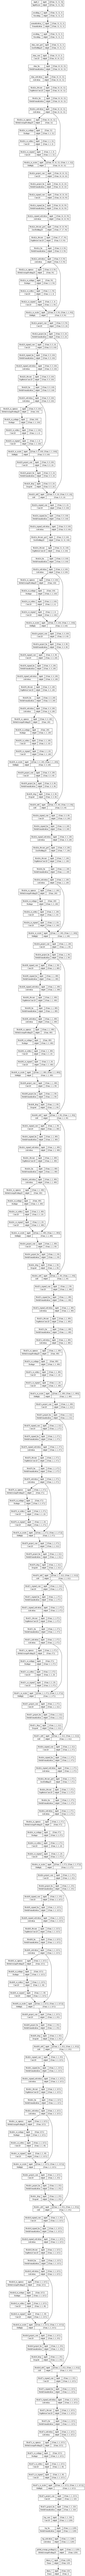

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from skimage.transform import resize
from tensorflow.keras.utils import plot_model  # Import plot_model

# Load the training datasets for DP and NDP
train_dp = pd.read_csv(r'D:\DataSet\train\trainDP.csv')
train_ndp = pd.read_csv(r'D:\DataSet\train\trainNDP.csv')

# Load the testing datasets for DP and NDP
test_dp = pd.read_csv(r'D:\DataSet\test\testDP.csv')
test_ndp = pd.read_csv(r'D:\DataSet\test\testNDP.csv')

# Combine DP and NDP datasets for training and testing
train_data = pd.concat([train_dp, train_ndp], ignore_index=True)
test_data = pd.concat([test_dp, test_ndp], ignore_index=True)

# Drop problematic columns
train_data = train_data.drop(columns=['FFT', 'Power spectral density'])
test_data = test_data.drop(columns=['FFT', 'Power spectral density'])

# Separate features and target variable for training data
X_train = train_data.drop(columns=['Class']).values
y_train = train_data['Class'].values

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Class']).values
y_test = test_data['Class'].values

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Resize input data to meet the minimum size requirement of EfficientNetB0
X_train_resized = np.array([resize(image, (32, 32), anti_aliasing=True) for image in X_train])
X_test_resized = np.array([resize(image, (32, 32), anti_aliasing=True) for image in X_test])

# Expand dimensions to simulate three channels
X_train_resized = np.expand_dims(X_train_resized, axis=-1)
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)

X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load EfficientNetB0 model pretrained on ImageNet without top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(128, activation='relu')(x)

# Add a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Plot the model architecture to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Train the model with 50 epochs
model.fit(X_train_resized, y_train_encoded, epochs=50, batch_size=64)

# Make predictions on the testing data
y_pred_proba = model.predict(X_test_resized)
y_pred = (y_pred_proba > 0.5).astype(int)

# Decode the predicted labels back to original string representations
y_pred_decoded = label_encoder.inverse_transform(y_pred.flatten())

# Generate classification report
report = classification_report(y_test, y_pred_decoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)

print("Accuracy:", accuracy)
print(report)
# Plot the model architecture to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True)